## Logistic Regression Implementation

Logistic Regression Implementation. For this exercise, use Scikit-Learn in Python. Download the dataset of the HW02 from piazza. The dataset is in Matlab format (.mat); you can use
scipy.io.savemat to convert it to python format (.npy). There are 126 training and 14 test samples,
each being a two-dimensional feature vector. There are two classes (0 and 1).

1.   Write down a code in Python (that uses logistic regression in Scikit-Learn) whose inputs are a
training dataset and a test dataset and its output is the classification error on the test set. 
2.   Report the classification error on the test set of the dataset used in the previous question. 
3.   Plot the data (use different colors for data in different classes) 
4.   Plot the decision boundary found by the logistic
regressions.
5.   Report the train and test classification accuracies (percentage of samples in the training/testing set that get classified correctly using the learned logistic regression model).

In [66]:
import scipy.io
from sklearn.linear_model import LogisticRegression
import numpy as np
import matplotlib.pyplot as plt

In [10]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive
%cd GitHub/
%cd "Machine Learning 6140"
mat = scipy.io.loadmat('hw02_dataset.mat')
mat.keys()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive
/content/drive/MyDrive/GitHub
/content/drive/MyDrive/GitHub/Machine Learning 6140


In [37]:
xTrain = mat['X_trn']
xTest = mat['X_tst']
yTrain = mat['Y_trn']
yTest = mat['Y_tst']

14

In [44]:
def logRegression(xTrain, yTrain):
  logreg = LogisticRegression()
  logreg.fit(xTrain,yTrain)
  return logreg

In [61]:
def accuracy(pred, corr, values, strData):
  '''
    Finding the correct prediction and then dividing it by total count
  '''
  correct = 0
  print(strData)
  for i in range(len(pred)):
    if pred[i] == corr[i]:
      correct += 1
    else:
      print("At point {0} the model predicted {1} instead of predicting it as {2}".format(values[i], pred[i], corr[i]))
  return (float(correct))/len(pred)

In [99]:
def plotPointsGraph(logRegModel, xX, yY):
  b = logRegModel.intercept_[0]
  w1, w2 = logRegModel.coef_.T
  c = -b/w2
  m = -w1/w2

  # Plot the data and the classification with the decision boundary.
  xmin, xmax = -2.5, 2.5
  ymin, ymax = -0.6, 3.2
  xd = np.array([xmin, xmax])
  yd = m*xd + c
  plt.plot(xd, yd, 'k', lw=1, ls='--')
  plt.fill_between(xd, yd, ymin, color='tab:blue', alpha=0.2)
  plt.fill_between(xd, yd, ymax, color='tab:red', alpha=0.2)
  plt.scatter(*xX[yY.ravel()==0].T, s=8, alpha=0.5)
  plt.scatter(*xX[yY.ravel()==1].T, s=8, alpha=0.5)
  plt.xlim(xmin, xmax)
  plt.ylim(ymin, ymax)
  plt.ylabel(r'$x_2$')
  plt.xlabel(r'$x_1$')
  plt.show()

In [ ]:
logRegModel = logRegression(xTrain, yTrain.ravel())

Test Dataset 14 Test Samples
At point [0.09501226 1.93607323] the model predicted 0 instead of predicting it as 1
Acccuracy of Test Set = 0.9285714285714286


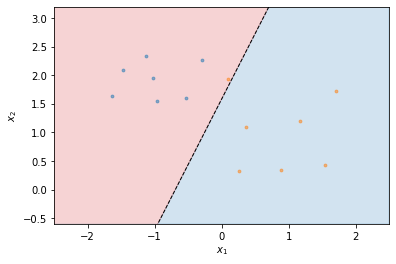

In [100]:
y_pred=logRegModel.predict(xTest)
print("Acccuracy of Test Set = {0}".format(accuracy(y_pred, yTest.ravel(), xTest, "Test Dataset 14 Test Samples")))
plotPointsGraph(logRegModel, xTest, yTest)

Training Dataset 126 Samples
At point [-0.25822186  0.93823088] the model predicted 1 instead of predicting it as 0
At point [0.4362074  1.11760096] the model predicted 1 instead of predicting it as 0
At point [-0.18597093  1.24664816] the model predicted 0 instead of predicting it as 1
At point [-0.15020593  2.03579494] the model predicted 0 instead of predicting it as 1
Acccuracy of Training Set = 0.9682539682539683


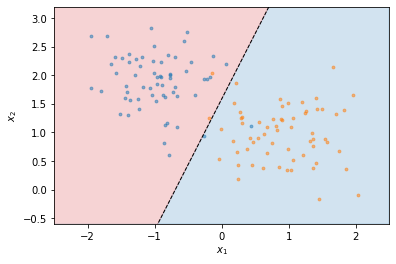

In [101]:
y_pred_training=logRegModel.predict(xTrain)
print("Acccuracy of Training Set = {0}".format(accuracy(y_pred_training, yTrain.ravel(), xTrain, "Training Dataset 126 Samples")))
plotPointsGraph(logRegModel, xTrain, yTrain)